In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255
input_shape = X_train.shape
print(X_train.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
#Train model
model = tf.keras.Sequential([
    tf.keras.Input(shape=input_shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2943 - accuracy: 0.9150 - val_loss: 0.1476 - val_accuracy: 0.9556
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1418 - accuracy: 0.9577 - val_loss: 0.1014 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1047 - accuracy: 0.9683 - val_loss: 0.0838 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0866 - accuracy: 0.9732 - val_loss: 0.0890 - val_accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0745 - accuracy: 0.9762 - val_loss: 0.0737 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0639 - accuracy: 0.9797 - val_loss: 0.0707 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0570 - accuracy: 0.9812 - val_loss: 0.0709 - val_accur

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


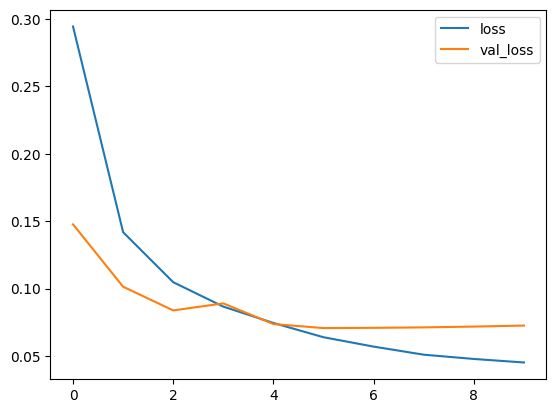

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

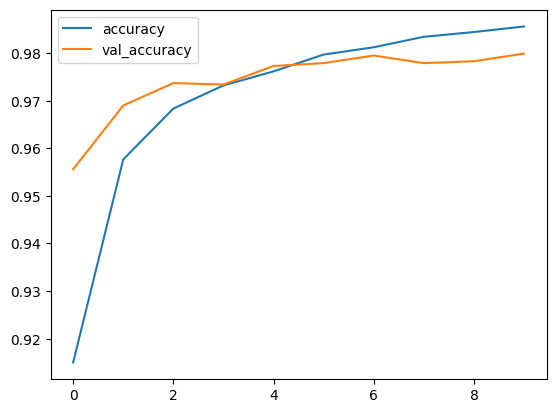

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [ ]:
#Predict
prediction = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred = np.argmax(prediction, axis=1)
print(pred)
print(y_test)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [ ]:
def confusion_matrix(y, pred):
  '''
  y (n_sample, ): True value
  pred (n_sample, ): Predicted Value
  return: None
  '''
  labels = np.unique(y)
  cfm = np.zeros((labels.shape[0], labels.shape[0]))
  for i in range(len(labels)):
    for j in range(len(labels)):
      temp = pred[y == labels[i]]

      unique, count = np.unique(temp, return_counts=True)
      value_count = dict(zip(unique, count))

      cfm[i][j] = value_count.get(labels[j], 0)

  plt.figure(figsize=(8, 8))
  sns.heatmap(cfm, annot=True, cmap="YlGnBu", fmt='g')
  plt.xlabel('Predict')
  plt.ylabel('Actual')

313/313 [==============================] - 1s 4ms/step - loss: 0.0726 - accuracy: 0.9799


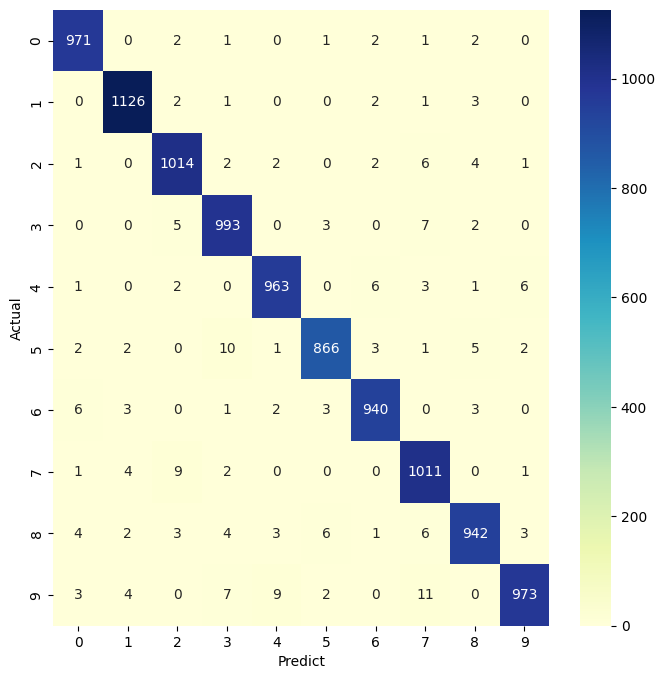

In [ ]:
confusion_matrix(y_test, pred)

# EVALUATION
score = model.evaluate(X_test, y_test)

Predicted: 7 , Actual: 2


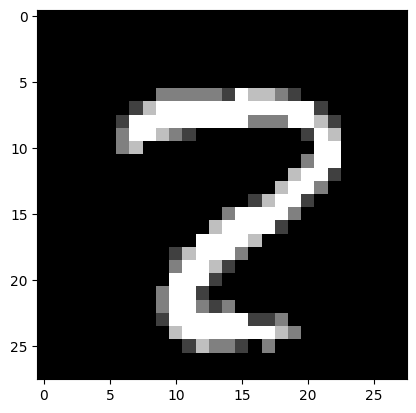

In [ ]:
misclassified_idx = np.where(y_test != pred)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
print('Predicted: %s , Actual: %s' % (pred[i], y_test[i]))